# Featurization and Model Tuning Project


# Description: 
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not
scaled). The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations).


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
# Import zscore for scaling
from scipy.stats import zscore
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [2]:
df = pd.read_csv("Concrete.csv")

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


- **It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).**
- **All the records are numeric.**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


- **It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.**
- **We can see that cement,slag,ash are left skewed.**

In [5]:
df.shape

(1030, 9)

- **It gives the details of the number of rows and columns present in the dataset.There are 1030 rows and 9 columns.**

In [6]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

- **It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type.**
- **Also,there are no null values in the data.**

In [7]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [10]:
df.duplicated().sum()

25

# Bivariate Analysis

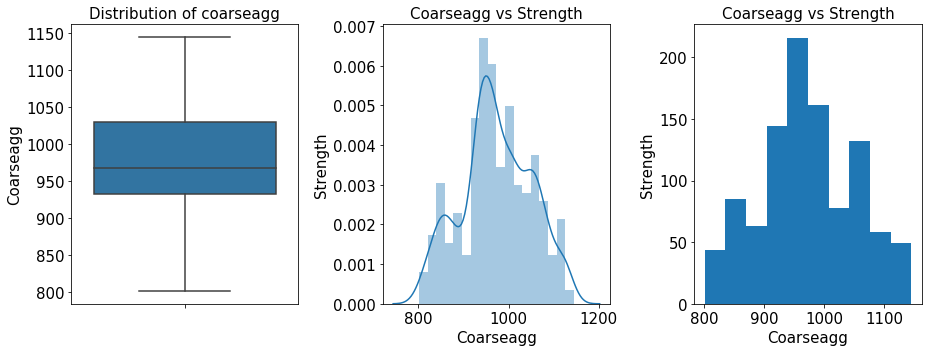

In [12]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='coarseagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Uni variate and Multi variate analysis

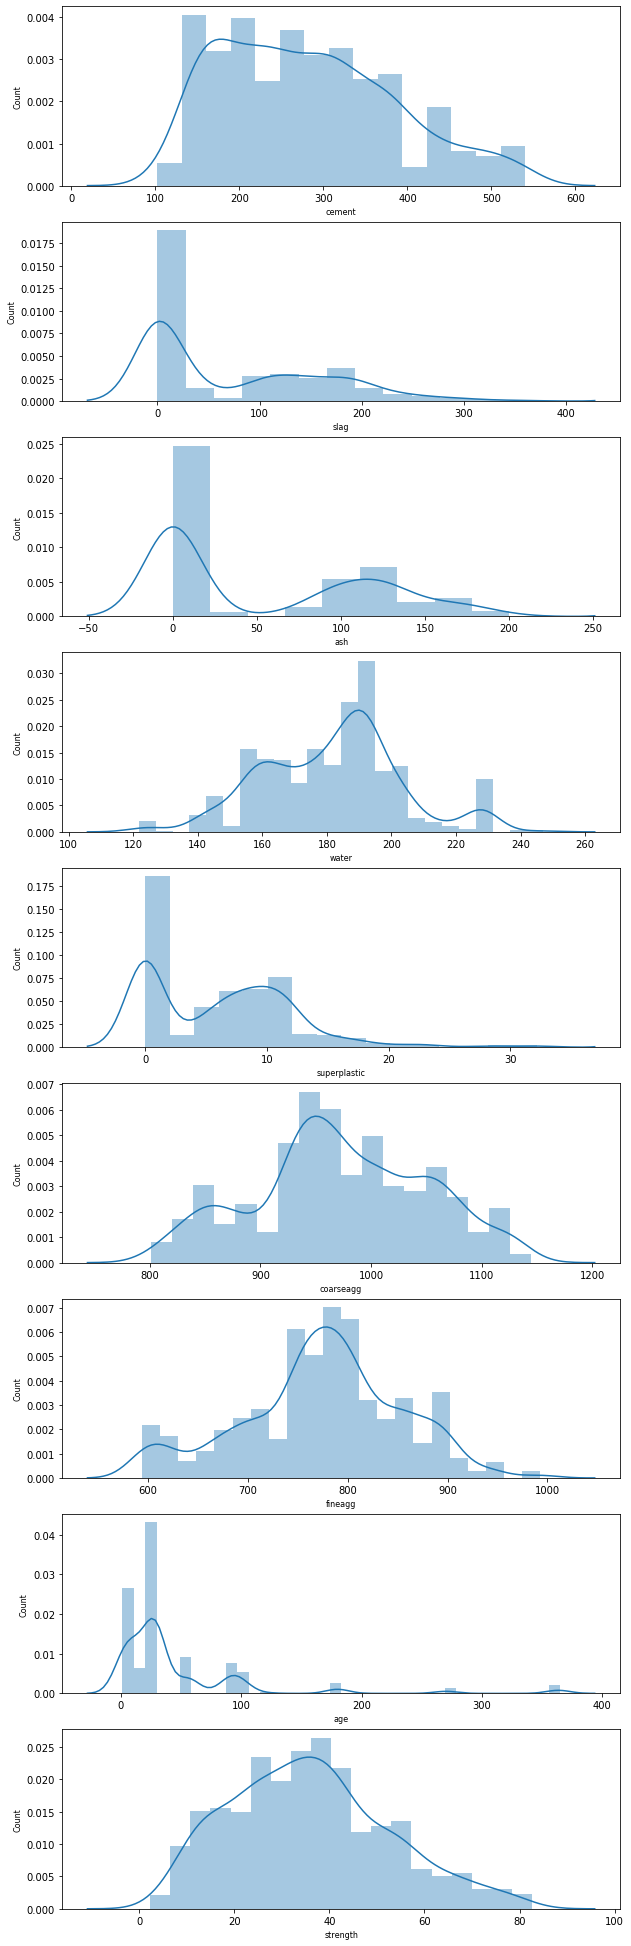

In [14]:
col_names = []
for col_name in  df.columns: 
    col_names.append(col_name)
#print(col_names)
fig, ax = plt.subplots(len(col_names), figsize=(10,35))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    #ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

We can see observe that :

- **cement is almost normal.**
- **slag has three gausssians and rightly skewed.**
- **ash has two gaussians and rightly skewed.**
- **water has three guassians and slighly left skewed.**
- **superplastic has two gaussians and rightly skewed.**
- **coarseagg has three guassians and almost normal.**
- **fineagg has almost two guassians and looks like normal.**
- **age has multiple guassians and rightly skewed.**

# Treating Outlier

In [15]:
from scipy.stats import iqr
df_outlier = df.copy()
Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


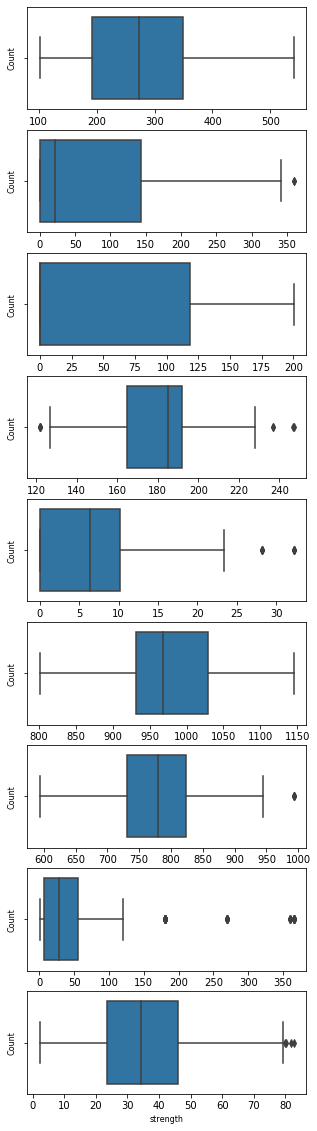

In [16]:
#sns.boxplot(x=boston_df['DIS']) 

col_names = []
for col_name in  df.columns: 
    col_names.append(col_name)
#print(col_names)
fig, ax = plt.subplots(len(col_names), figsize=(5,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(x=df[col_val], ax=ax[i])
    #ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [17]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df_outlier < Q1 - 1.5 * IQR)[0], np.where(df_outlier < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df_outlier.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df_outlier > Q3 + 1.5 * IQR)[0], np.where(df_outlier > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df_outlier.iloc[i,j] = whisker[j]

# Plotting after fixing outliers

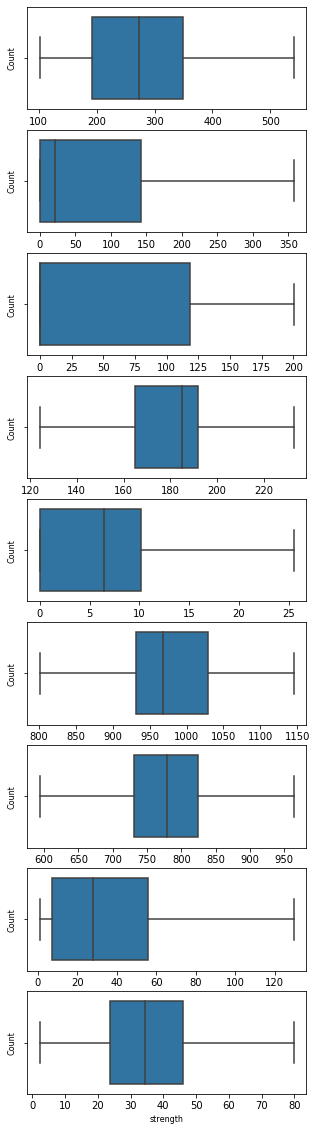

In [18]:
#sns.boxplot(x=boston_df['DIS']) 

col_names = []
for col_name in  df_outlier.columns: 
    col_names.append(col_name)
#print(col_names)
fig, ax = plt.subplots(len(col_names), figsize=(5,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(x=df_outlier[col_val], ax=ax[i])
    #ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

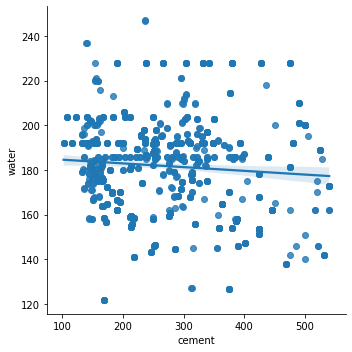

In [19]:
# water vs cement
#lm plot
sns.lmplot(x="cement",y="water",data=df)
plt.show()

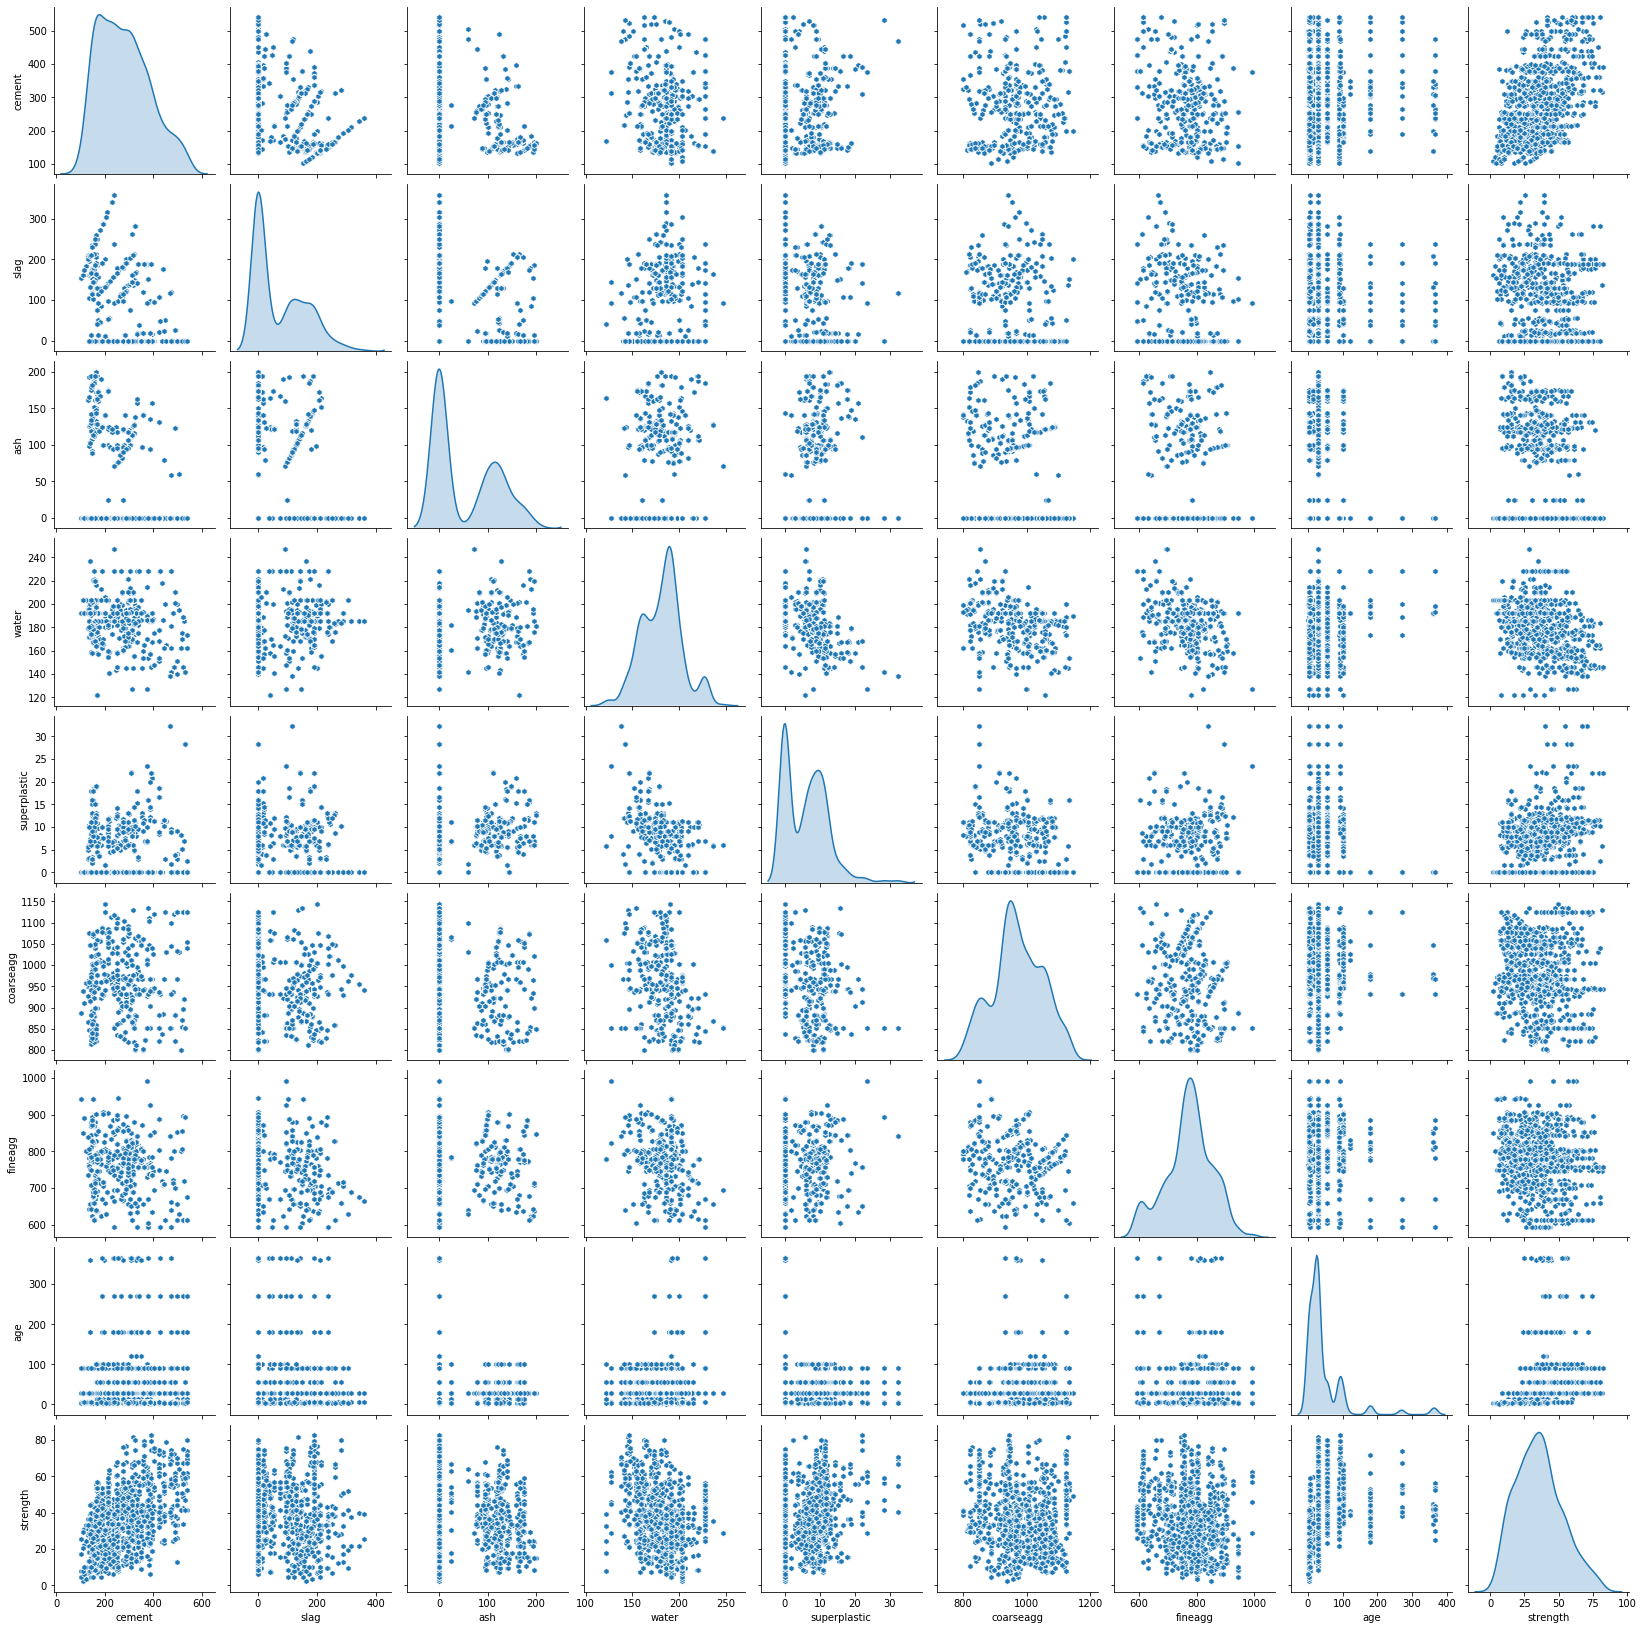

In [20]:
sns.pairplot(df,markers="h", diag_kind='kde')
plt.show()

Diagonals Analysis
The diagonal gives the same information, we got using distplot.

- **cement attribute have almost normal curve.**
- **slag has two gausssians and rightly skewed.It shows the presence of outlies.**
- **ash has two gaussians and rightly skewed.It shows the presence of outlies.**
- **water has atleast guassians and slighly left skewed.It shows the presence of outlies.**
- **superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.**
- **coarseagg has three guassians and almost normal.**
- **fineagg has almost two guassians and looks like normal.**
- **age has multiple guassians and rightly skewed. It shows the presence of outlies.**
- **strength is close to a normal curve.**
- **We not only have missing values problem but also outliers problem in the dataset.**

strength attribute : Relationship between dependent and independent attributes

strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has positive relationship with the strength, it is not a very good predictor. It is a weak predictor.

strength vs slag: There is no particular trend.

strength vs slag: There is also no particular trend.

strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.

strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
Other attributes does not give any strong relationship with strength.

Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model

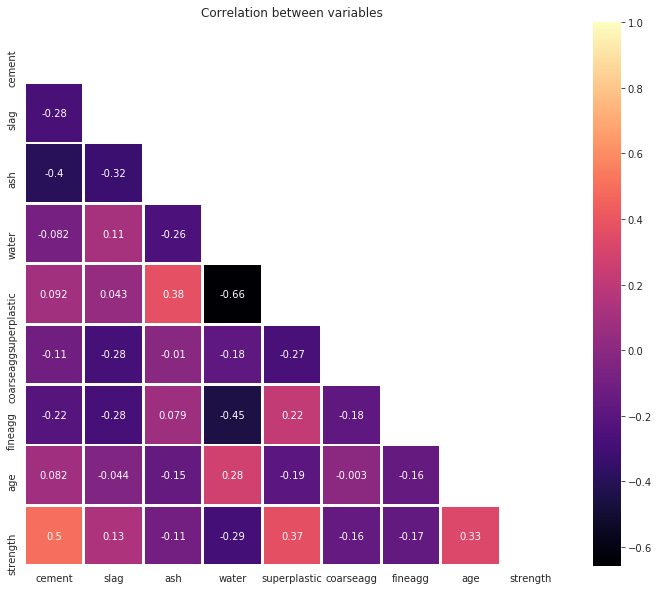

In [21]:
cor = df.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

In [22]:
df_concrete = df.copy()

In [23]:
df_concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [24]:
#Binning days to months
def label(df_concrete):
    if df_concrete["age"] <= 30:
        return "1 month"
    if df_concrete["age"] > 30 and df_concrete["age"] <= 60 :
        return "2 months"
    if df_concrete["age"] > 60 and df_concrete["age"] <= 90 :
        return "3 months"
    if df_concrete["age"] > 90 and df_concrete["age"] <= 120 :
        return "4 months"
    if df_concrete["age"] > 120 and df_concrete["age"] <= 150 :
        return "5 months"
    if df_concrete["age"] > 150 and df_concrete["age"] <= 180 :
        return "6 months"
    if df_concrete["age"] > 180 and df_concrete["age"] <= 210 :
        return "7 months"
    if df_concrete["age"] > 210 and df_concrete["age"] <= 240 :
        return "8 months"
    if df_concrete["age"] > 240 and df_concrete["age"] <= 270 :
        return "9 months"
    if df_concrete["age"] > 270 and df_concrete["age"] <= 300 :
        return "10 months"
    if df_concrete["age"] > 300 and df_concrete["age"] <= 330 :
        return "11 months"
    if df_concrete["age"] > 330 :
        return "12 months"
df_concrete["age_months"] = df_concrete.apply(lambda df_concrete:label(df_concrete) , axis=1)

In [25]:
df_concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_months
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1 month
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1 month
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1 month
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1 month
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1 month


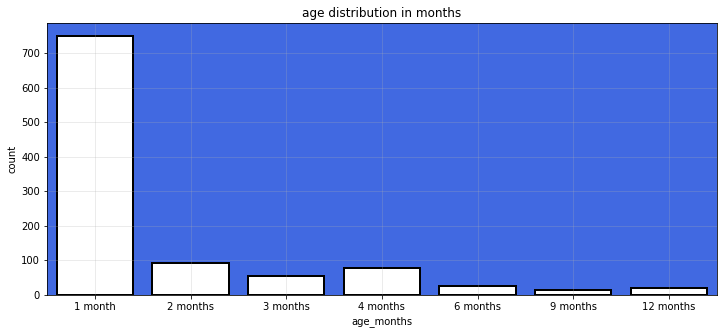

In [26]:
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(df_concrete["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("royalblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

In [27]:
#renaming columns
df_concrete = df_concrete.rename(columns={'cement':"cement",
       'slag':"furnace_slag",
       'ash':"fly_ash",
       'water':"water",
       'superplastic':"super_plasticizer",
       'coarseagg':"coarse_agg",
       'fineagg':"fine_agg", 'age':"age",
       'strength':"compressive_strength"})

In [28]:
df_concrete.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength,age_months
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1 month
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1 month
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1 month
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1 month
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1 month


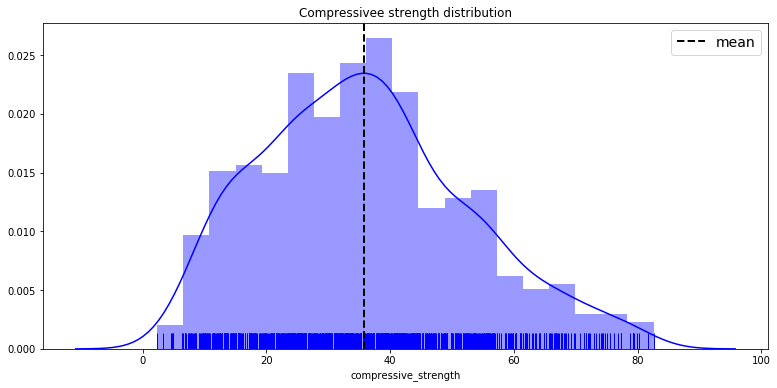

In [29]:
plt.figure(figsize=(13,6))
sns.distplot(df_concrete["compressive_strength"],color="b",rug=True)
plt.axvline(df_concrete["compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

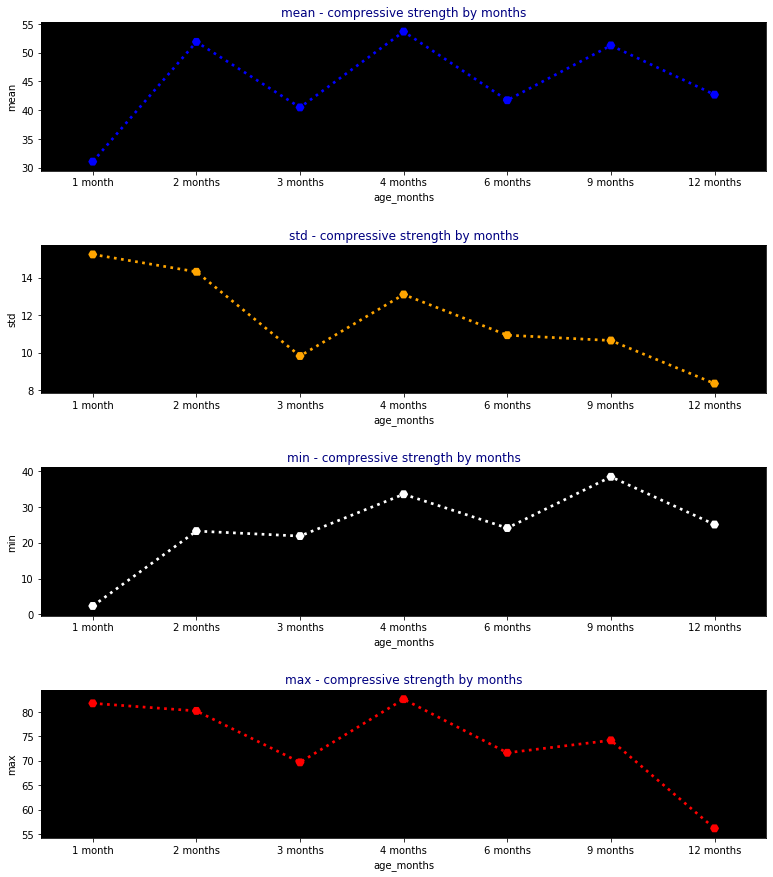

In [30]:
 import itertools
age_mon = df_concrete.groupby("age_months")["compressive_strength"].describe().reset_index()

order  = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
cols   = [ 'mean', 'std' , 'min' , 'max']
length = len(cols)
cs     = ["b","orange","white","r"] 

fig = plt.figure(figsize=(13,15))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,1,j+1)
    ax = sns.pointplot("age_months",i,data=age_mon,
                       order=order,
                       markers="H",
                       linestyles="dotted",color=k)
    plt.subplots_adjust(hspace=.5)
    ax.set_facecolor("k")
    plt.title(i+" - compressive strength by months",color="navy")

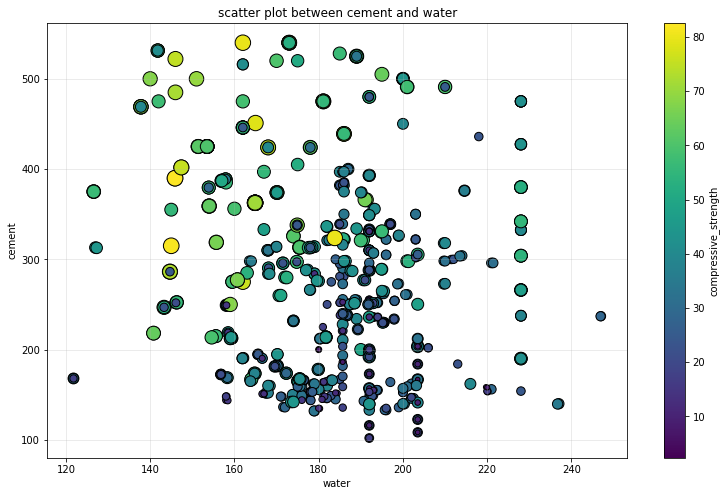

In [31]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df_concrete["water"],df_concrete["cement"],
            c=df_concrete["compressive_strength"],s=df_concrete["compressive_strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

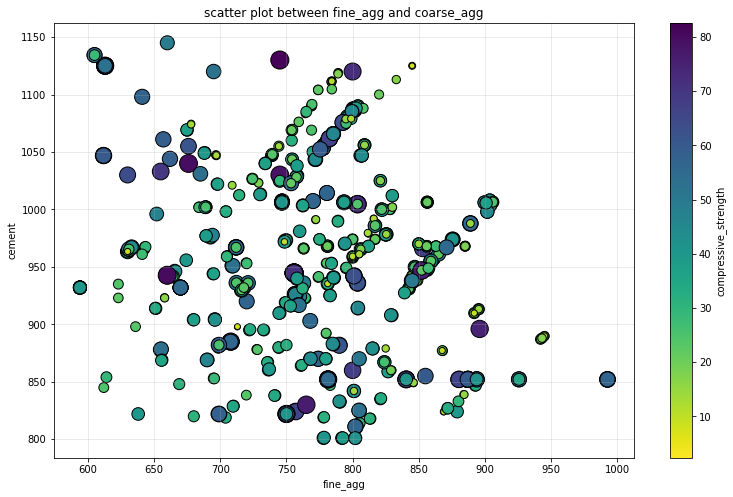

In [32]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df_concrete["fine_agg"],df_concrete["coarse_agg"],
            c=df_concrete["compressive_strength"],s=df_concrete["compressive_strength"]*4,
            linewidth=1,edgecolor="k",cmap="viridis_r")
ax.set_facecolor("w")
ax.set_xlabel("fine_agg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between fine_agg and coarse_agg")
plt.grid(True,alpha=.3)
plt.show()

In [33]:
# create a feature preparation pipeline for a model
def make_pipeline(model):
    steps = list()
    # standardization
    #steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

In [34]:
df_outlier.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age             float64
strength        float64
dtype: object

In [35]:
df_outlier_z = df_outlier.copy()

# Scaling data

In [36]:
#Scaling the dataset
df_outlier_z = df_outlier_z.apply(zscore)
df_outlier_z=pd.DataFrame(df_outlier_z,columns=df_outlier_z.columns)

In [37]:

#independent and dependent variables
X=df_outlier_z.drop('age',axis=1)
y = df_outlier_z['age']

In [38]:

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# K-Mean clustering

In [39]:
df_outlier_z_1 = df_outlier_z.copy()

In [40]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_outlier_z_1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7590.051693
2,3,6375.593399
3,4,5569.991260
4,5,4971.082810
5,6,4507.740344
6,7,4222.996032
7,8,3938.621816
8,9,3714.136929
9,10,3488.232452


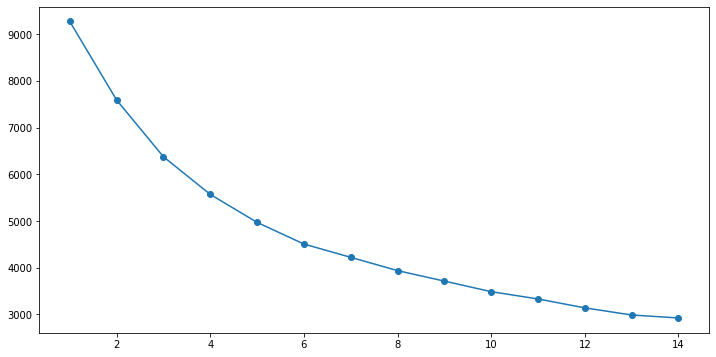

In [41]:

# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [42]:

# k=6
cluster = KMeans( n_clusters = 6, random_state = 1 )
cluster.fit(df_outlier_z_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [43]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(df_outlier_z_1)
df_outlier_z_1["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
df_outlier_z_1_copy = df_outlier_z_1.copy(deep = True)

In [44]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.02478705,  0.46127092, -0.50102218, -0.98722741,  1.12873123,
        -0.62770203,  0.21825128, -0.10895332,  1.19820203],
       [-0.83681819,  1.3949742 , -0.82598032,  0.50721783, -0.67972401,
        -0.0146711 , -0.17791366, -0.41403415, -0.65672063],
       [-0.60422387, -0.65372054,  1.11155159, -0.6226218 ,  0.41855486,
         0.60499991,  0.41909729,  0.01242028, -0.17224261],
       [-0.42405829,  0.17850001,  1.09490842,  0.58699943,  0.40657837,
        -1.19463684, -0.34199638, -0.32941517, -0.24386287],
       [ 0.67444667, -0.84293005, -0.83544352,  0.40081971, -1.01154157,
         0.72330498, -0.04469988, -0.59915954, -0.58790406],
       [ 0.48883535, -0.1945495 , -0.82313562,  1.19679883, -1.02178654,
         0.01885059, -0.66569127,  1.99357903,  0.45544305]])

In [45]:
centroid_df = pd.DataFrame(centroids, columns = list(df_outlier))
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.024787,0.461271,-0.501022,-0.987227,1.128731,-0.627702,0.218251,-0.108953,1.198202
1,-0.836818,1.394974,-0.825980,0.507218,-0.679724,-0.014671,-0.177914,-0.414034,-0.656721
2,-0.604224,-0.653721,1.111552,-0.622622,0.418555,0.605000,0.419097,0.012420,-0.172243
3,-0.424058,0.178500,1.094908,0.586999,0.406578,-1.194637,-0.341996,-0.329415,-0.243863
4,0.674447,-0.842930,-0.835444,0.400820,-1.011542,0.723305,-0.044700,-0.599160,-0.587904
5,0.488835,-0.194550,-0.823136,1.196799,-1.021787,0.018851,-0.665691,1.993579,0.455443


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002F97C4D388>,
      dtype=object)

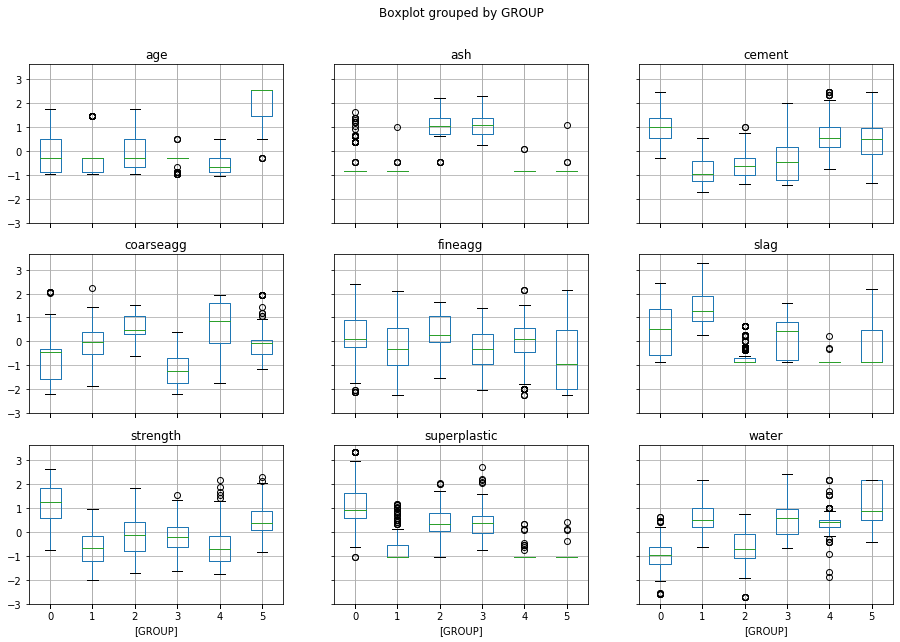

In [46]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
##import matplotlib.pylab as plt
df_outlier_z_1.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

- **the body of the cluster are overlapping.**
- **So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.**

In [47]:
df_outlier_z_1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,-1.339017,1.601727,-0.847144,1.034976,-1.061968,-0.014398,-0.312618,-0.281572,-0.355005,1
1,-1.074790,-0.367551,1.096078,-1.095618,0.800217,1.388141,0.285302,-0.673017,-0.737422,2
2,-0.298384,-0.856971,0.648965,0.276070,-0.113633,-0.206121,1.100078,-0.281572,-0.395165,2
3,-0.145209,0.465159,-0.847144,2.189833,-1.061968,-0.526517,-1.296616,-0.281572,0.601638,1
4,-1.209776,1.270035,-0.847144,0.554178,0.507095,0.958372,-0.961932,-0.281572,-1.050309,1


In [48]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# Feature Importance and removing least important feature

In [49]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.112660
slag          0.018615
ash           0.010304
water         0.143299
superplastic  0.117382
coarseagg     0.047321
fineagg       0.089005
strength      0.461414


So, cement, age and water are significant attributes.
Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [50]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 1.0
Performance on testing data using DT: 0.36561081356140823
Accuracy DT:  0.36561081356140823
MSE:  0.6341813704757467


There is a overfitting in the model as the dataset is performing 100% accurately in trainnig data. However, the accuracy on test data drops.

In [51]:

#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'Train Score':[dt_model.score(X_train,y_train)] ,'Test Score':[dt_model.score(X_test,y_test)]},index={'1'})
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.0,0.365611


In [52]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.502126720057432
Standard Deviation:  0.09674815123521555


In [53]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy], 'Train Score':[accuracy] ,'Test Score':[accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127


# Iteration 2

Drop the least significant variable

In [54]:
df_outlier_z_2 = df_outlier_z.copy()

In [55]:
#independent and dependent variable
X = df_outlier_z_2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_outlier_z_2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y, test_size = 0.3, random_state = 1)

# Regularising/Pruning of Decision Tree

In [56]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_2 , y_train_2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [57]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train_2.columns))

Feature importances: 
                    Imp
cement        0.380759
slag          0.113315
water         0.136259
superplastic  0.033004
age           0.336663


In [58]:
y_pred_2 = dt_model.predict(X_test_2)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train_2,y_train_2))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test_2,y_test_2))
#Evaluate the model using accuracy
acc_DT_2=metrics.r2_score(y_test_2, y_pred_2)
print('Accuracy DT: ',acc_DT_2)

Performance on training data using DT: 0.9942549842498984
Performance on testing data using DT: 0.838135651675364
Accuracy DT:  0.8381356516753641


In [59]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT_2], 'Train Score':[dt_model.score(X_train_2,y_train_2)] ,'Test Score':[dt_model.score(X_test_2,y_test_2)]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136


In [60]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train_2, y_train_2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [61]:
y_pred = reg_dt_model.predict(X_test_2)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train_2,y_train_2))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test_2,y_test_2))
#Evaluate the model using accuracy
acc_RDT_2=metrics.r2_score(y_test_2, y_pred_2)
print('Accuracy DT: ',acc_RDT_2)
print('MSE: ',metrics.mean_squared_error(y_test_2, y_pred_2))

Performance on training data using DT: 0.7230907351876024
Performance on testing data using DT: 0.6635235726448326
Accuracy DT:  0.8381356516753641
MSE:  0.16877192614014444


In [62]:

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT_2], 'Train Score':[reg_dt_model.score(X_train_2,y_train_2)] ,'Test Score':[reg_dt_model.score(X_test_2,y_test_2)]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524



K fold cross validation

In [63]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6737357393333292
Standard Deviation:  0.04970309745759895


In [64]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy], 'Train Score':[accuracy] ,'Test Score':[accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score', 'Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736



# Iteration 3

In [65]:
df_outlier_z_3 = df_outlier_z.copy()

In [66]:
#independent and dependent variable
X_3 = df_outlier_z_3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y_3 = df_outlier_z_3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3,y_3, test_size = 0.3, random_state = 1)

In [67]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train_3, y_train_3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [68]:
y_pred_3 = reg_dt_model.predict(X_test_3)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train_3,y_train_3))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test_3,y_test_3))
#Evaluate the model using accuracy
acc_RDT_3=metrics.r2_score(y_test_3, y_pred_3)
print('Accuracy DT: ',acc_RDT_3)
print('MSE: ',metrics.mean_squared_error(y_test_3, y_pred_3))

Performance on training data using DT: 0.7230907351876024
Performance on testing data using DT: 0.6635235726448326
Accuracy DT:  0.6635235726448326
MSE:  0.35083559371327483


In [69]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT_3], 'Train Score':[reg_dt_model.score(X_train_3,y_train_3)] ,'Test Score':[reg_dt_model.score(X_test_3,y_test_3)]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524



# K Means Clustering to explore Guassian

In [70]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_outlier_z_3)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7590.051693
2,3,6375.593399
3,4,5570.098238
4,5,4970.700880
5,6,4507.823370
6,7,4222.529115
7,8,3953.430113
8,9,3709.207691
9,10,3536.243875


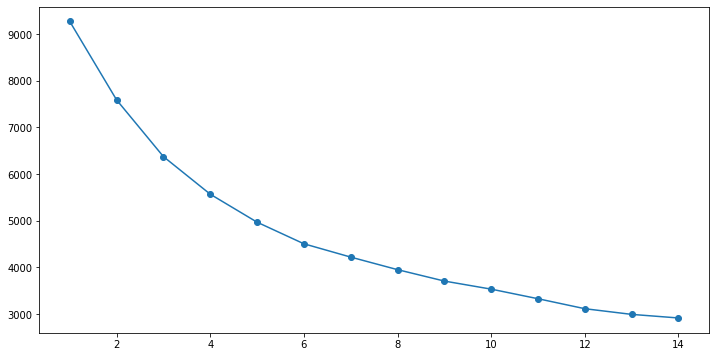

In [71]:

# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [72]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(df_outlier_z_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [73]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(df_outlier_z_3)
df_outlier_z_3["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
df_outlier_z_3_copy = df_outlier_z_3.copy(deep = True)

In [74]:

centroids = cluster.cluster_centers_
centroids

array([[ 1.0296383 ,  0.45436913, -0.50283433, -0.99083042,  1.1172616 ,
        -0.61450704,  0.21885172, -0.10985708,  1.20328197],
       [-0.42405829,  0.17850001,  1.09490842,  0.58699943,  0.40657837,
        -1.19463684, -0.34199638, -0.32941517, -0.24386287],
       [-0.83681819,  1.3949742 , -0.82598032,  0.50721783, -0.67972401,
        -0.0146711 , -0.17791366, -0.41403415, -0.65672063],
       [ 0.48883535, -0.1945495 , -0.82313562,  1.19679883, -1.02178654,
         0.01885059, -0.66569127,  1.99357903,  0.45544305],
       [ 0.66636484, -0.84284118, -0.83536947,  0.41396036, -1.01122242,
         0.71590475, -0.04708998, -0.60116959, -0.60534947],
       [-0.60422387, -0.65372054,  1.11155159, -0.6226218 ,  0.41855486,
         0.60499991,  0.41909729,  0.01242028, -0.17224261]])

In [75]:
centroid_df = pd.DataFrame(centroids, columns = list(df_outlier_z) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.029638,0.454369,-0.502834,-0.990830,1.117262,-0.614507,0.218852,-0.109857,1.203282
1,-0.424058,0.178500,1.094908,0.586999,0.406578,-1.194637,-0.341996,-0.329415,-0.243863
2,-0.836818,1.394974,-0.825980,0.507218,-0.679724,-0.014671,-0.177914,-0.414034,-0.656721
3,0.488835,-0.194550,-0.823136,1.196799,-1.021787,0.018851,-0.665691,1.993579,0.455443
4,0.666365,-0.842841,-0.835369,0.413960,-1.011222,0.715905,-0.047090,-0.601170,-0.605349
5,-0.604224,-0.653721,1.111552,-0.622622,0.418555,0.605000,0.419097,0.012420,-0.172243


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002F909C53C8>,
      dtype=object)

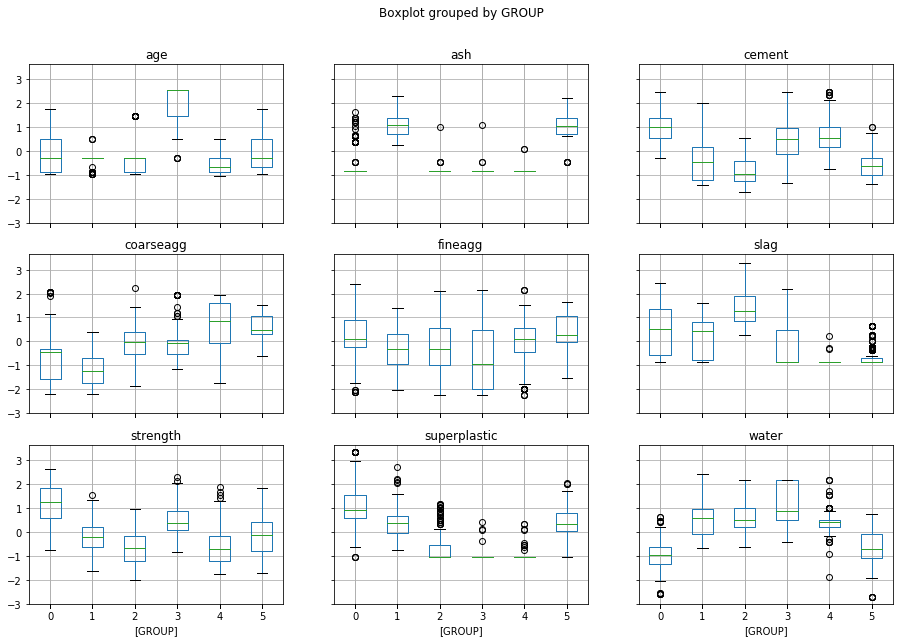

In [76]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
df_outlier_z_3.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

Here, None of the dimensions are good predictor of target variable.

For all the dimensions (variables) every cluster have a similar range of values except in one case.

We can see that the body of the cluster are overlapping.

So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

# Finding best estimator using ramdonized search cv

In [79]:
# build a classifier
clf = RandomForestRegressor(n_estimators=50)

In [80]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(0, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}

In [81]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [82]:
randomCV.fit(X, y) 
print(randomCV.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [83]:
model=RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 3, min_samples_leaf= 7, min_samples_split= 7)
model.fit(X_train_3, y_train_3)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
y_pred = model.predict(X_test_3)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train_3,y_train_3))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test_3,y_test_3))
#Evaluate the model using accuracy
acc_RFR_3=metrics.r2_score(y_test_3, y_pred_3)
print('Accuracy DT: ',acc_RFR_3)
print('MSE: ',metrics.mean_squared_error(y_test_3, y_pred_3))

Performance on training data using RFR: 0.9039254836272788
Performance on testing data using RFR: 0.8541686429109346
Accuracy DT:  0.6635235726448326
MSE:  0.35083559371327483


This model is also overfit.

In [85]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR_3], 'Train Score':[model.score(X_train_3,y_train_3)] ,'Test Score':[model.score(X_test_3,y_test_3)]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169


K fold cross validation

In [86]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8698600758501553
Standard Deviation:  0.02030975933249228


In [87]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy], 'Train Score':[accuracy] ,'Test Score':[accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860



Gradient Boosting Regressor

In [88]:
model=GradientBoostingRegressor()
model.fit(X_train_3, y_train_3)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
y_pred_3 = model.predict(X_test_3)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train_3,y_train_3))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test_3,y_test_3))
#Evaluate the model using accuracy
acc_GBR_3=metrics.r2_score(y_test_3, y_pred_3)
print('Accuracy DT: ',acc_GBR_3)
print('MSE: ',metrics.mean_squared_error(y_test_3, y_pred_3))

Performance on training data using GBR: 0.9430438043023188
Performance on testing data using GBR: 0.8880551328863496
Accuracy DT:  0.8880551328863495
MSE:  0.11672212590249398


In [90]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR_3], 'Train Score':[model.score(X_train_3,y_train_3)] ,'Test Score':[model.score(X_test_3,y_test_3)]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055


K fold cross validation

In [91]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8996354204324206
Standard Deviation:  0.01847940674258505


In [92]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy], 'Train Score':[accuracy] ,'Test Score':[accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score' , 'Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635



Ada Boosting Regressor

In [93]:
model=AdaBoostRegressor()
model.fit(X_train_3, y_train_3)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [94]:
y_pred_3 = model.predict(X_test_3)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train_3,y_train_3))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test_3,y_test_3))
#Evaluate the model using accuracy
acc_ABR_3=metrics.r2_score(y_test_3, y_pred_3)
print('Accuracy DT: ',acc_ABR_3)
print('MSE: ',metrics.mean_squared_error(y_test_3, y_pred_3))

Performance on training data using GBR: 0.8195412788809239
Performance on testing data using GBR: 0.7545137475819919
Accuracy DT:  0.7545137475819919
MSE:  0.25596240364442896


In [95]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR_3], 'Train Score':[model.score(X_train_3,y_train_3)] ,'Test Score':[model.score(X_test_3,y_test_3)]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635



K fold cross validation

In [96]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7785471757202418
Standard Deviation:  0.029536358208790026


In [97]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy], 'Train Score':[accuracy] ,'Test Score':[accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score' ,'Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635


Bagging Regressor

In [98]:
model=BaggingRegressor()
model.fit(X_train_3, y_train_3)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [99]:
y_pred_3 = model.predict(X_test_3)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train_3,y_train_3))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test_3,y_test_3))
#Evaluate the model using accuracy
acc_BR_3=metrics.r2_score(y_test_3, y_pred_3)
print('Accuracy DT: ',acc_BR_3)
print('MSE: ',metrics.mean_squared_error(y_test_3, y_pred_3))

Performance on training data using GBR: 0.9746020190973395
Performance on testing data using GBR: 0.8975915268042984
Accuracy DT:  0.8975915268042984
MSE:  0.10677876538720979


In [100]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR_3], 'Train Score':[model.score(X_train_3,y_train_3)] ,'Test Score':[model.score(X_test_3,y_test_3)]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score' ,'Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635


K fold cross validation

In [101]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9061646148610281
Standard Deviation:  0.023513393452840436


In [102]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy], 'Train Score':[accuracy] ,'Test Score':[accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635


KNN Regressor

In [103]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_3,y_train_3)
    pred_i = knn.predict(X_test_3)
    error.append(np.mean(pred_i!=y_test_3))

Text(0, 0.5, 'Mean error')

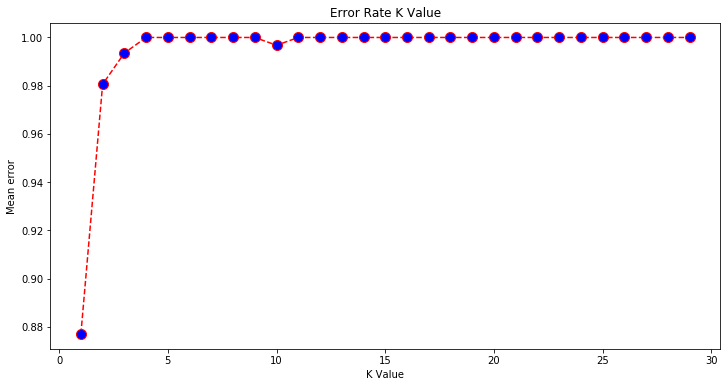

In [104]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [105]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train_3, y_train_3)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [106]:
y_pred = model.predict(X_test_3)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train_3,y_train_3))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test_3,y_test_3))
#Evaluate the model using accuracy
acc_K_3=metrics.r2_score(y_test_3, y_pred_3)
print('Accuracy KNNR: ',acc_K_3)
print('MSE: ',metrics.mean_squared_error(y_test_3, y_pred_3))

Performance on training data using KNNR: 0.914694117919545
Performance on testing data using KNNR: 0.8278882763747251
Accuracy KNNR:  0.8975915268042984
MSE:  0.10677876538720979


In [107]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K_3], 'Train Score':[model.score(X_train_3,y_train_3)] ,'Test Score':[model.score(X_test_3,y_test_3)]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635


K fold cross validation

In [108]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8296848093303388
Standard Deviation:  0.03054460843349837


In [109]:

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy], 'Train Score':[accuracy] ,'Test Score':[accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score' ,'Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635


Support Vector Regressor

In [110]:

model = SVR(kernel='linear')
model.fit(X_train_3, y_train_3)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [111]:
y_pred_3 = model.predict(X_test_3)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train_3,y_train_3))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test_3,y_test_3))
#Evaluate the model using accuracy
acc_S_3=metrics.r2_score(y_test_3, y_pred_3)
print('Accuracy SVR: ',acc_S_3)
print('MSE: ',metrics.mean_squared_error(y_test_3, y_pred_3))

Performance on training data using SVR: 0.6940065296337425
Performance on testing data using SVR: 0.6975138868961444
Accuracy SVR:  0.6975138868961444
MSE:  0.315394739283754


In [112]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S_3] ,'Train Score':[model.score(X_train_3,y_train_3)] ,'Test Score':[model.score(X_test_3,y_test_3)]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy','Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635



K fold cross validation

In [113]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6776738500062338
Standard Deviation:  0.06867047394110631


In [114]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy], 'Train Score':[accuracy] ,'Test Score':[accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score','Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635


# Tuning and Create model

polynomical regression on SVM degree 2

In [115]:
X_poly = df_outlier_z.iloc[:, 2:].values 
y_poly = df_outlier_z.iloc[:, 1].values 
    #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(X_poly) 

In [116]:

X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(x_poly,y_poly, test_size = 0.3, random_state = 1)

In [117]:
S_reg_2 =SVR()  
S_reg_2.fit(X_train_P, y_train_P)  

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [118]:
y_pred_P = S_reg_2.predict(X_test_P)
# performance on train data
print('Performance on training data using SVR:',S_reg_2.score(X_train_P,y_train_P))
# performance on test data
print('Performance on testing data using SVR:',S_reg_2.score(X_test_P,y_test_P))
#Evaluate the model using accuracy
acc_S_P=metrics.r2_score(y_test_P, y_pred_P)
#print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test_P, y_pred_P))

Performance on training data using SVR: 0.6760217219831726
Performance on testing data using SVR: 0.4471462786350949
MSE:  0.55121953132429


In [119]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Poly Support Vector Regressor'], 'accuracy': [acc_S_P], 'Train Score':[S_reg_2.score(X_train_P,y_train_P)] ,'Test Score':[S_reg_2.score(X_test_P,y_test_P)]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score', 'Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635


ridge with polynomical regression

In [120]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_P,y_train_P)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.         -0.69038416 -0.54946075  0.09477316 -0.55606209 -0.64441317
  0.43019213 -0.44365355  0.19837331  0.03702667 -0.21044094  0.07536254
  0.00750341 -0.04306894  0.14148843 -0.23339903  0.04379503 -0.22463802
 -0.12706519  0.07847671  0.11779949 -0.10524201 -0.00199896  0.00531646
 -0.19538831  0.22533559 -0.10739098  0.01720814  0.05202076  0.16228054
  0.01063954  0.08451515  0.15031773 -0.33677009  0.21575527  0.0904365 ]


In [121]:
print(ridge.score(X_train_P, y_train_P))
print(ridge.score(X_test_P, y_test_P))

0.5726117205818022
0.34653331180184554


lasso with polynomical regression

In [122]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_P,y_train_P)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         -0.21395423 -0.          0.         -0.21101202 -0.2060239
 -0.          0.          0.          0.         -0.03937069  0.
 -0.          0.         -0.         -0.01134349  0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.          0.04382732 -0.0401577   0.          0.          0.
 -0.          0.          0.         -0.06287711  0.          0.00676044]


In [123]:
print(lasso.score(X_train_P, y_train_P))
print(lasso.score(X_test_P, y_test_P))

0.30372736455690064
0.2779334485387609


polynomical regression on SVM degree 3

In [124]:
 #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs_d3= PolynomialFeatures(degree= 2)  
#x_poly= poly_regs.fit_transform(X_train_P)  
S_reg_2_d3 =SVR()  
S_reg_2_d3.fit(X_train_P, y_train_P)  

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [125]:
y_pred_P_d3 = S_reg_2_d3.predict(X_test_P)
# performance on train data
print('Performance on training data using SVR:',S_reg_2_d3.score(X_train_P,y_train_P))
# performance on test data
print('Performance on testing data using SVR:',S_reg_2_d3.score(X_test_P,y_test_P))
#Evaluate the model using accuracy
acc_S_P_d3=metrics.r2_score(y_test_P, y_pred_P)
#print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test_P, y_pred_P_d3))

Performance on training data using SVR: 0.6760217219831726
Performance on testing data using SVR: 0.4471462786350949
MSE:  0.55121953132429


In [126]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Poly Support Vector Regressor degree 3'], 'accuracy': [acc_S_P_d3], 'Train Score':[S_reg_2_d3.score(X_train_P,y_train_P)] ,'Test Score':[S_reg_2_d3.score(X_test_P,y_test_P)]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'Train Score', 'Test Score']]
results

,Method,accuracy,Train Score,Test Score
1,Decision Tree,0.365611,1.000000,0.365611
2,Decision Tree k fold,0.502127,0.502127,0.502127
3,Decision Tree2,0.838136,0.994255,0.838136
4,Pruned Decision Tree,0.838136,0.723091,0.663524
5,Pruned Decision Tree k fold,0.673736,0.673736,0.673736
6,Pruned Decision Tree2,0.663524,0.723091,0.663524
7,Random Forest Regressor,0.663524,0.903925,0.854169
8,Random Forest Regressor k fold,0.869860,0.869860,0.869860
9,Gradient Boost Regressor,0.888055,0.943044,0.888055
10,Gradient Boost Regressor k fold,0.899635,0.899635,0.899635


# Confidence Level

Using Bagging Regressor

In [127]:
concrete_XY = X.join(y)

In [128]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 150       
# size of a bootstrap sample
n_size = int(len(df_outlier_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model        
    bgTree = BaggingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    bgTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = bgTree.score(test[:, :-1] , y_test)
    predictions = bgTree.predict(test[:, :-1])  

    stats.append(score)

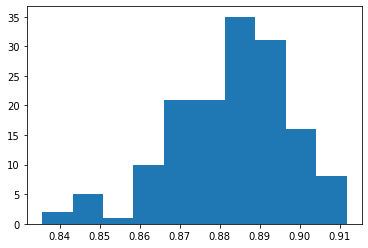

95.0 confidence interval 84.7% and 90.6%


In [129]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Using KNeighbors Regressor

In [131]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 150        
# size of a bootstrap sample
n_size = int(len(df_outlier_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    knnTree = KNeighborsRegressor(n_neighbors=3)
    # fit against independent variables and corresponding target values
    knnTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = knnTree.score(test[:, :-1] , y_test)
    predictions = knnTree.predict(test[:, :-1])  

    stats.append(score)

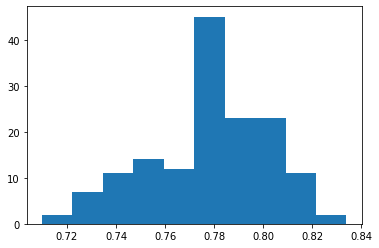

95.0 confidence interval 72.5% and 81.8%


In [132]:

# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 84.7% and 90.6%. 

- **The Bagging Regressor classification model performance is between 84.7% and 90.6%. which is better than other classification algorithms.**